##ResNet

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import cv2
import os
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from keras.applications import ResNet50V2
from keras.layers import Flatten, Dense, Dropout
from keras.models import Sequential
from keras.utils import to_categorical

In [3]:
# Veri yolu
DATADIR = "/content/drive/MyDrive/DerinOgrenme/RetinalImaging/Eyes/"
CATEGORIES = ["Cataract", "Diabetic Retinopathy", "Glaucoma", "Normal"]
IMG_SIZE = 50


# Tüm veriyi depolamak için liste
all_data = []

In [4]:
# Tüm veriyi alma fonksiyonu
def create_all_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img))
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                all_data.append([new_array, class_num])
            except Exception as e:
                pass

In [5]:
# Tüm veriyi oluşturma
create_all_data()

# Giriş ve çıkış verilerini ayırma
X = []
y = []
for features, label in all_data:
    X.append(features)
    y.append(label)

In [6]:
# Veriyi eğitim ve test setlerine ayırma
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

##Model Eğitme

In [7]:
from tensorflow.keras.applications import ResNet50V2

res = ResNet50V2(input_shape=(IMG_SIZE, IMG_SIZE, 3), include_top=False)

94668760/94668760 [==============================] - 3s 0us/step


In [8]:
# Eğitim, test ve doğrulama setleri için özellik çıkartma
train_features = res.predict(np.array(x_train))
test_features = res.predict(np.array(x_test))

27/27 [==============================] - 1s 48ms/step


In [9]:
# Özellik vektörlerini düzleştirme
train_features_flatten = train_features.reshape(train_features.shape[0], -1)
test_features_flatten = test_features.reshape(test_features.shape[0], -1)

In [10]:
# SVM için veri hazırlama
svm_model = SVC(kernel='linear', C=1.0,probability=True, random_state=42)

In [11]:
# SVM modelini eğitme
svm_model.fit(train_features_flatten, y_train)

SVC(kernel='linear', probability=True, random_state=42)

In [12]:
# Test verisi üzerinde sınıflandırma yapma
svm_predictions = svm_model.predict(test_features_flatten)

In [13]:
# Model performansını değerlendirme
svm_accuracy = accuracy_score(y_test, svm_predictions)
print("SVM Model Doğruluğu:", svm_accuracy)

print("Sınıflandırma Raporu:")
print(classification_report(y_test, svm_predictions))

SVM Model Doğruluğu: 0.7867298578199052
Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.78      0.86      0.82       233
           1       0.94      0.95      0.94       224
           2       0.65      0.68      0.66       188
           3       0.74      0.62      0.68       199

    accuracy                           0.79       844
   macro avg       0.78      0.78      0.78       844
weighted avg       0.79      0.79      0.78       844



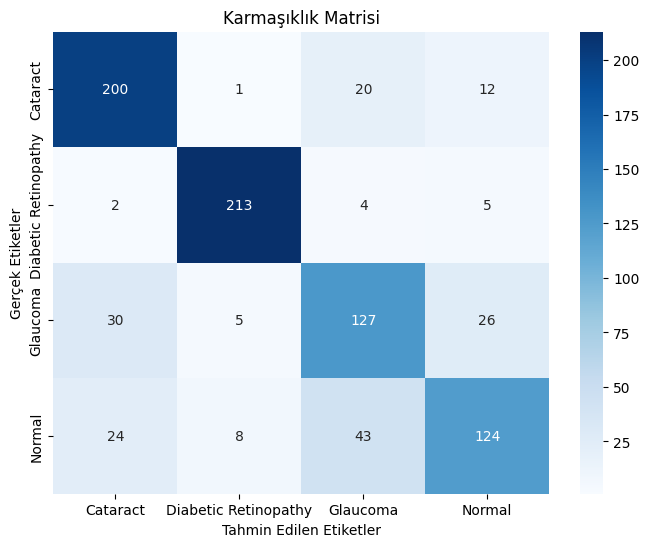

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Karmaşıklık Matrisi (Confusion Matrix) görselleştirmesi
def plot_confusion_matrix(y_true, y_pred, classes):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=classes, yticklabels=classes)
    plt.xlabel('Tahmin Edilen Etiketler')
    plt.ylabel('Gerçek Etiketler')
    plt.title('Karmaşıklık Matrisi')
    plt.show()

# Karmaşıklık Matrisi görselleştirmesi
plot_confusion_matrix(y_test, svm_predictions, CATEGORIES)
